# Bird Song Analysis

This package is a port of the [Sound Analysis Toolbox for Matlab (SAT)](http://soundanalysispro.com/matlab-sat) in Python 3. It provides function to measure features of Zebra Finches songs, and to compare their similarities.

It does not give the exact same results as SAT, but gives qualitatively similar results. The variations in the results are due to the fact I removed some hackish code that was hard to port in Python.

# Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.io import matlab

import birdsonganalysis as bsa

In [3]:
sns.set_palette('muted')

First we load a wavfile, the output is a simple 1D array

In [4]:
sr, sig = wavfile.read('../songs/simple.wav')

Now, we load the mat file with the data computed with [SAT]((http://soundanalysispro.com/matlab-sat) for comparison

In [5]:
sat = matlab.loadmat('../birdsonganalysis/tests/simple.mat',
                                  squeeze_me=True, struct_as_record=False)['simple']

# Spectral derivatives

We compute the spectral derivatives of the song. It is like a sonogram but we plot the slope of the power and not the power itself. It makes the sound features more visible. It uses [multitaper spectral analysis](https://en.wikipedia.org/wiki/Multitaper).

In [6]:
spec_der = bsa.spectral_derivs(sig)

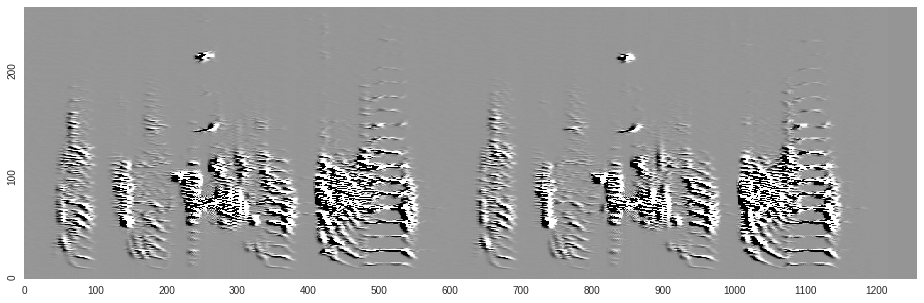

In [7]:
contrast = 0.02  # A smaller contrast saturates more but makes visible less saillant changes in the song spectrogram

fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, contrast, ax)  # Draws the spectral derivatives on the `ax`
plt.show(fig)


# Song Features

## Frequency Modulation

Frequency modulation is the absolute slope of the frequency along time. see [Frequency Modulation on SAP2011](http://soundanalysispro.com/manual-1/chapter-4-the-song-features-of-sap2/frequency-amplitude-modulation).

The blue curve are the values computed by `birdsonganalysis`. The green curve are the values computed by `SAT`. The values are normalized before being drawn.

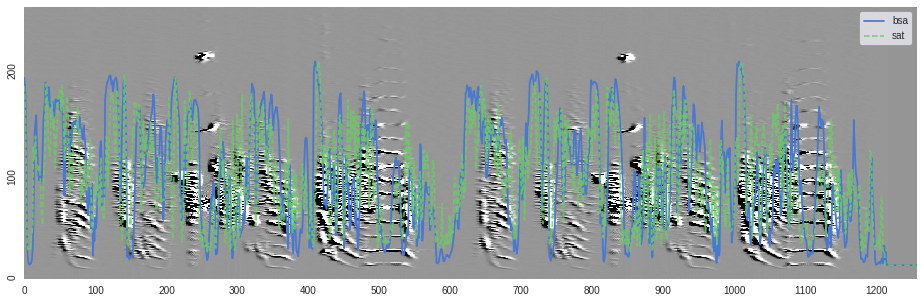

In [8]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, contrast, ax) 
fm = bsa.song_frequency_modulation(sig)
ax = bsa.plot_over_spec(fm, ax, label='bsa')
ax = bsa.plot_over_spec(sat.FM, ax, label='sat', alpha=0.8, ls='--')
ax.legend(frameon=True)
plt.show(fig)

## Amplitude

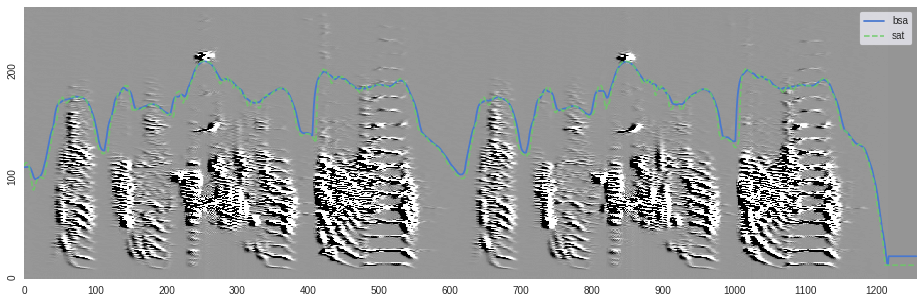

In [9]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, 0.01, ax)
amp = bsa.song_amplitude(sig)
ax = bsa.plot_over_spec(amp, ax, label='bsa')
sat_amp = np.copy(sat.amplitude)
sat_amp[sat_amp < 0] = 0
ax = bsa.plot_over_spec(sat_amp, ax, label='sat', alpha=0.8, ls='--')
ax.legend(frameon=True)
plt.show(fig)

## Pitch

Pitch is computed with the Yin Algorithm, both in SAT and birdsonganalysis.

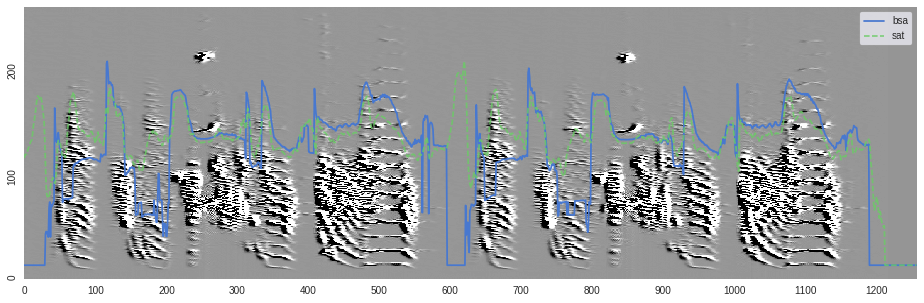

In [10]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, 0.01, ax)
pitches = bsa.song_pitch(sig, sr, threshold=0.9)
ax = bsa.plot_over_spec(pitches, ax, label='bsa')
ax = bsa.plot_over_spec(sat.pitch, ax,  label='sat', alpha=0.8, ls='--')
ax.legend(frameon=True)
plt.show(fig)

## Wiener Entropy

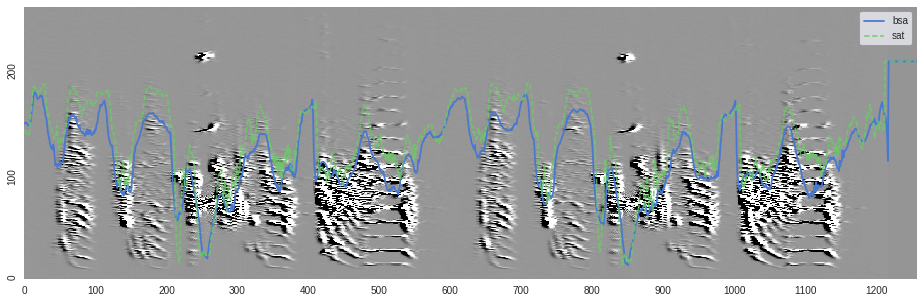

In [11]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, contrast, ax) 
wiener = bsa.song_wiener_entropy(sig)
ax = bsa.plot_over_spec(wiener, ax, label='bsa')
ax = bsa.plot_over_spec(sat.entropy, ax,  label='sat', alpha=0.8, ls='--')
ax.legend(frameon=True)

plt.show(fig)

## Amplitude Modulation

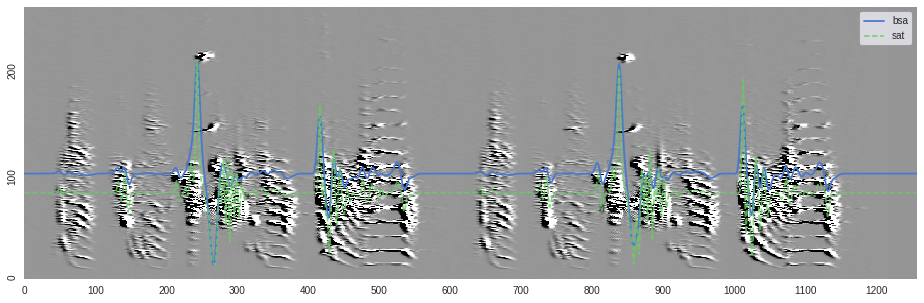

In [12]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, contrast, ax) 
am = bsa.song_amplitude_modulation(sig)
ax = bsa.plot_over_spec(am, ax, label='bsa')
ax = bsa.plot_over_spec(sat.AM, ax,  label='sat', alpha=0.8, ls='--')
ax.legend(frameon=True)

plt.show(fig)